# Diseño de las dimensiones de la máquina

Según {cite}`pellegrino16` el máximo par se puede aproximar como

$$
\tau_e = 2 \sigma V_r
$$ (eq:tau_sigma)

donde $V_r$ es el volumen del rotor, y $\sigma$ es el esfuerzo de corte. En la siguiente tabla se pueden encontrar algunos valores típicos de $\sigma$,

![table_3p1_shear_stress.png](figs/table_3p1_shear_stress.png)


Los parámetros de entrada pueden ser varios. Por ejemplo la potencia mecánica nominal ($P_n$) y la velocidad nominal ($\Omega_n$), que se relacionan con el par ($T_n$) según:

$$
\begin{aligned}
P_n = \Omega_n T_n
\end{aligned}
$$

En el siguiente ejemplo se supone que se conocen $P_n$ y $\Omega_n$ con lo que se obtiene $T_n$. Si se supone un valor de $\sigma$ típico, con {eq}`eq:tau_sigma`, se puede obtener un valor aproximado de volumen de rotor, $V_r$. 

Una vez obtenido el volumen se debe determinar el diámetro ($D_r$) y la longitud del rotor ($L_r$).

$$
V_r = L_r \pi \left(\frac{D_r}{2}\right)^2
$$ (eq:Vr_L_D)

En el ejemplo se supondrá que la longitud es conocida.



In [3]:
import matplotlib.pyplot as plt
import numpy as np
import json
plt.ion()

### Estimación del volumen y el diámetro

A modo de ejemplo se consideran los parámetros de un motor de ABB

![abb_motor_data.png](figs/abb_motor_data.png)

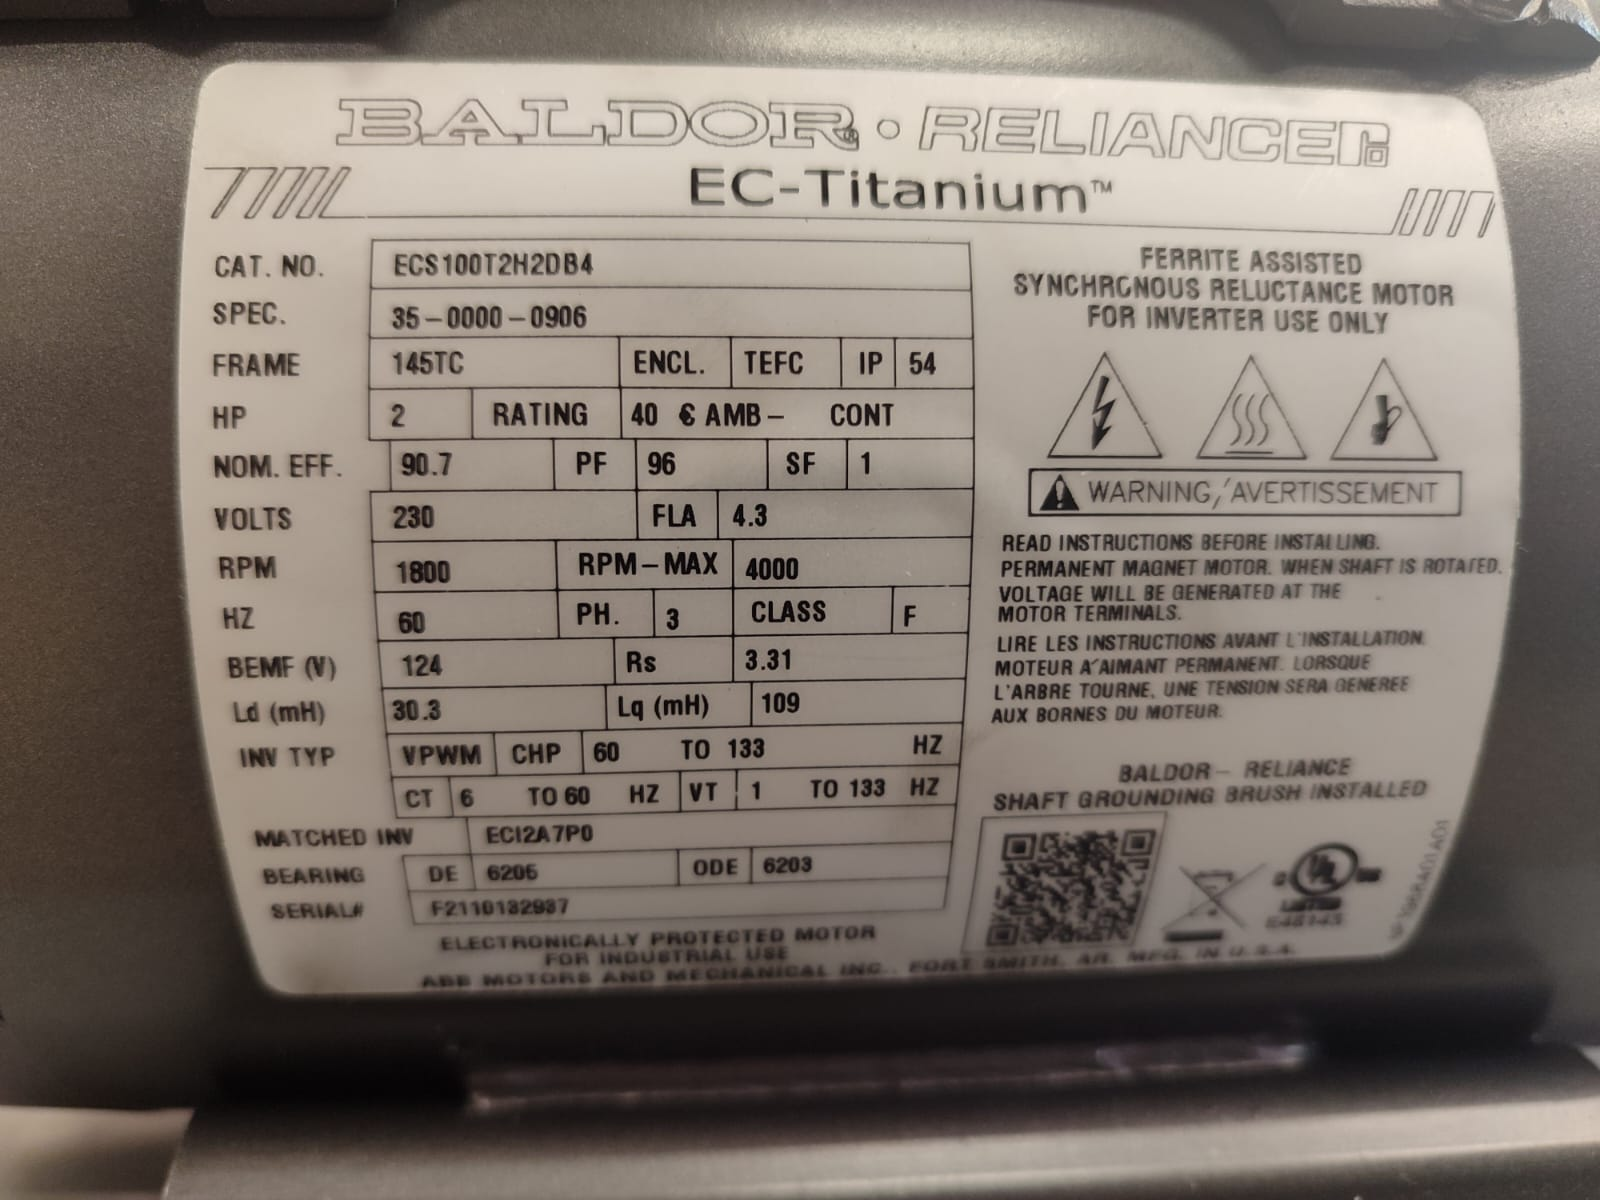

### Párametros de entrada

In [4]:
P_n = 2*735.499 # Potencia nominal (W)
Omega_n = 1800*2*np.pi/60 # velocidad nominal (rad/s)

### Cálculos

In [8]:
Tau_n = 65.0
print(f'Par nominal: Tau_n = {Tau_n:0.2f} Nm')

Par nominal: Tau_n = 65.00 Nm


In [12]:
sigma = 15e3 # valor supuesto (Pa)
V_r = Tau_n/(2*sigma) # volumen del rotor

Length = 0.11 # Stack length (m), valor supuesto
D_r = 2*np.sqrt(V_r/(np.pi*Length)) # V = L*pi*(D/2)**2

print(f'Rotor diameter: D_r = {D_r:0.3f} m ({D_r*100:0.2f} cm)')

Rotor diameter: D_r = 0.158 m (15.84 cm)


In [11]:
I_n = 4.3 # A (Manufacturer)
U_n = 230.0 # V (Manufacturer)
FP = 0.96 # power factor (Manufacturer)
P_sn = np.sqrt(3)*U_n*I_n*FP
print(f'Input power (manufacturer): P_sn = {P_sn:0.1f} W')

rend = P_n/P_sn 
print(f'Rendimiento (manufacturer): rend = {rend*100:0.1f} %  (man. 90.7%)')


Input power (manufacturer): P_sn = 1644.5 W
Rendimiento (manufacturer): rend = 89.5 %  (man. 90.7%)


In [13]:
data = {'manufacturer':{'I_nom':I_n, 'P_mec_nom':P_n, 'P_s_nom':P_sn,
                        'rend':rend,'pf':FP,'U_nom':U_n,'R_s':3.31,
                        'L_d':30.3e3,'L_q':109e3}}

file = 'design.json'
with open(file,'w') as fobj:
    fobj.write(json.dumps(data))